### 1.) RLC Circuit
    a. If the initial values are i(0)=0 and q(0)=1, use Euler’s method to solve this pair of differential equations numerically from t=0 to 0.1 s using a step size of Δt=0.01 s. Employ the following parameters for your calculation: R=200 Ω, L=5 H, and C=10−4
    b. Develop a plot of i and q versus t.
    c. Use calculus or a symbolic math package to obtain the analytic solution. Compare it with the numerical solution.
As depicted in the figure below, an RLC circuit consists of three elements: a resistor (R), an inductor (L), and a capacitor (C). The flow of current across each element induces a voltage drop. Kirchhoff’s second voltage law states that the algebraic sum of these voltages drops around a closed circuit is zero,
iR+Ldidt+qC
where i = current, R = resistance, L = inductance, t = time, q = charge, and C = capacitance. In addition, the current is related to charge as in

In [1]:
function eulers_method(h, r, l, c, t0, tf, i0, q0)
#= Print out the time, current, and charge from the inputs step size, resistance, inductance, conductance,
    initial time, final time, initial current, and initial charge value. Calls the graph function after. =#
    terms = Int(((tf+ 0.01)-t0)/h) #computes for the number of terms and transforms it into an integer
    charge = ([Float64(q0)]); current = ([Float64(i0)]) #converts q0 and i0 into float for solving later
    for i = 1:terms
        push!(charge, (charge[i]+current[i]*h)) #eulers, appends next term into charge array
        push!(current, (current[i]-((current[i]*(r/l) + ((charge[i]/c)/l))*h)))    
        println(round(((i/100)-0.01), sigdigits=2), "            ", charge[i], "                      ",
            current[i])
        i += 1
    end
    graph_rlc(terms, charge, current)
end

eulers_method (generic function with 1 method)

In [2]:
function calculus_method(h, t0, tf)
#= Calculus is used to solve for the solutions for charge and current using the inputs of step size,
    initial time, and final time. Calls the graph function after. =#
    charge = [1.0]; current = [0.0] #arrays that will hold our values
    println(0.0, "           ", charge[1], "       ", current[1])
    terms = Int((tf-t0)/h) #computes for the number of terms and transforms it into an integer
    for i = 2:terms + 1
        t = (i-1)/100 #this becomes 0.0, 0.01, 0.02, 0.03, 0.04
        push!(current, -20*exp(-20t)*(cos(40t) + .5*sin(40t)) + (exp(-20t))*(-40*sin(40t) + 20*cos(40t)))
        push!(charge, exp(-20t)*(cos(40t) + .5*sin(40t))) #formula solved by master of math jg manlapaz     
        println(t, "           ", charge[i], "       ", current[i])
        i += 1
    end 
    graph_rlc(terms, charge, current)
end
#credit kay master jg

calculus_method (generic function with 1 method)

In [3]:
using Plots; pyplot()
function graph_rlc(terms, fx1, fx2)
#= Graphs the values of the two functions by the time. Takes in an input of the two functions to be 
    graphed. =#
    println("\n Graphing the charge and current against time")
    t = 0:terms #x-axis: 0.0, 0.01, 0.02, 0.03 ...
    plot(t/100, fx1, linewidth=2, label="charge", legend=:bottomright)
    plot!(t/100, fx2, linewidth=2, color="red", label="current") 
    xlims!(0.0,0.1)
    xlabel!("time (s)")
    ylabel!("charge (C) and current (A)")
end

graph_rlc (generic function with 1 method)

Use Euler’s method to solve this pair of differential equations numerically from t=0 to 0.1 s using a step size of Δt=0.01 s. Employ the following parameters for your calculation: R=200 Ω, L=5 H, and C=10−4 F.

Time(s)       Charge(C)                 Current(A)
0.0            1.0                      0.0
0.01            1.0                      -19.999999999999996
0.02            0.8                      -31.999999999999993
0.03            0.4800000000000001                      -35.199999999999996
0.04            0.1280000000000001                      -30.72
0.05            -0.17919999999999986                      -20.992
0.06            -0.3891199999999999                      -9.011200000000004
0.07            -0.47923199999999994                      2.3756799999999956
0.08            -0.45547519999999997                      11.010047999999996
0.09            -0.34537472                      15.715532799999995
0.1            -0.18821939200000007                      16.336814079

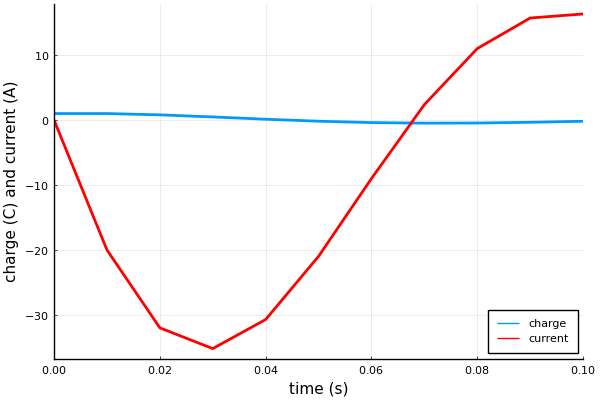

In [4]:
println("Use Euler’s method to solve this pair of differential equations numerically from t=0 to 0.1 s using a step size of Δt=0.01 s. Employ the following parameters for your calculation: R=200 Ω, L=5 H, and C=10−4 F.\n")
println("Time(s)       Charge(C)                 Current(A)")

eulers_method(0.01, 200, 5, 10^-4, 0.0, 0.1, 0 ,1)

Use Calculus to solve this pair of differential equations numerically from t=0 to 0.1 s using a step size of Δt=0.01 s. Employ the following parameters for your calculation: R=200 Ω, L=5 H, and C=10−4 F.

Time(s)       Charge(C)                Current(A)
0.0           1.0       0.0
0.01           0.913515347581107       -15.941438633037038
0.02           0.707445557420788       -24.042908393785723
0.03           0.454623099922328       -25.57569478366272
0.04           0.21144849469842336       -22.456868580677916
0.05           0.01416404894540483       -16.725591461963113
0.06           -0.12037591885054927       -10.172280017090669
0.07           -0.1910456381744146       -4.130353039243053
0.08           -0.20744500731469034       0.5892768149474503
0.09           -0.18480723786936654       3.657406864598134
0.1           -0.13967208459371888       5.121104002833686

 Graphing the charge and current against time


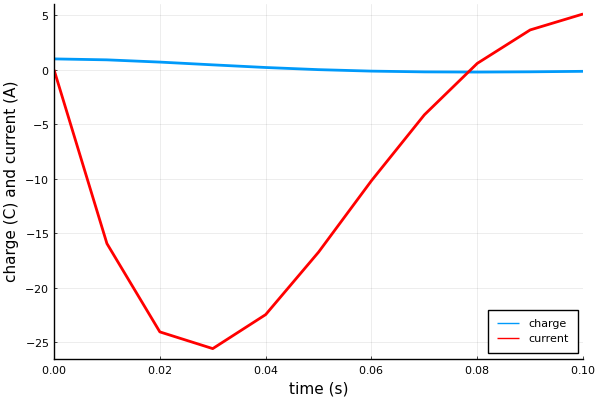

In [5]:
println("Use Calculus to solve this pair of differential equations numerically from t=0 to 0.1 s using a step size of Δt=0.01 s. Employ the following parameters for your calculation: R=200 Ω, L=5 H, and C=10−4 F.\n")
println("Time(s)       Charge(C)                Current(A)")

calculus_method(0.01, 0, 0.1)

### 2.) Evaluate exponential function (e^-5)
    a. e−x=1−x+x22−x33!+⋯ (di ko pa naaayos formatting di ako masyado marunong maglatex so search ko pa pano maya hehe)
    b. e−x=1ex=11+x+x22+x33!+⋯
Evaluate e−5 using two approaches and compare with the true value of 6.737947×10−3. Use 20 terms to evaluate each series and compute true and approximate relative errors as terms are added. Explain the reason if there are discrepancies in the errors.

In [6]:
function approach1(x, terms)
#= Print out the term number, numerical approximation, and then compute the true and approximate relative 
    errors by comparing it to the true value. Takes an input of the x (or the value to be exponentiated) 
    and the number of terms. Calls the graph function after. =#
    true_value = exp(x) 
    approximation = ([0.0, 1.0]) #array that will hold the terms with the first term being 1.0
    println("Term #    Approximation               True Error          Approximate Error")
    for i = 2:terms + 1
        true_error = abs((true_value - approximation[i])/true_value)*100
        approximate_error = abs((approximation[i]-approximation[i-1])/approximation[i])*100
        println(i-1, "          ", approximation[i], "       ", true_error, "%      ", approximate_error,"%") 
        push!(approximation, (approximation[i]+(x^(i-1)/factorial(i-1)))) #append new term to array for plotting
        i += 1
    end
    graph_against_true_value(terms, approximation, true_value) 
end

approach1 (generic function with 1 method)

In [7]:
function approach2(x, terms)
#= Print out the term number, numerical approximation, and then compute the true and approximate relative 
    errors by comparing it to the true value. Takes an input of x (or the value to be exponentiated)
    and the number of terms. Calls for the graph function after. =#
    true_value = exp(x) 
    x = abs(x) #ito ang pinagkaiba ng approach 1 at 2, positive lagi x dito
    approximation = ([0.0, 1.0]) #array that will hold the terms, this is e^x
    approximation_1 = [(1.0)] #a separate array for plotting, this is 1/e^x
    println("Term #    Approximation               True Error          Approximate Error")
    for i = 2:terms + 1
        true_error = abs((true_value - approximation[i])/true_value)*100
        approximate_error = abs((approximation[i]-approximation[i-1])/approximation[i])*100
        println(i-1, "          ", 1/approximation[i], "       ", true_error, "%      ", approximate_error,"%")
        push!(approximation, approximation[i] + (x^(i-1))/factorial(i-1)) 
        push!(approximation_1, 1/approximation[i]) #append new term to the array, for plotting later
        i += 1
    end
    graph_against_true_value(terms, approximation_1, true_value)
end

approach2 (generic function with 1 method)

In [8]:
using Plots; pyplot()
function graph_against_true_value(terms, fx, true_value)
#= Graphs the approximations by the number of terms and superimposes the true value. Takes
    in the number of terms, the array to be approximated, and the true value to be superimposed as a
    horizontal line. =#
    println("\n Graphing the approximations against the true value")
    t = 1:terms #x-axis 
    true_plot = []
    plot(t, fx, linewidth=2, label="numerical approximation", markershape = :circle)
    for i = 0:terms #make an array with a size of terms full of true value to plot a horizontal line
        push!(true_plot, true_value)
    end
    plot!(t, true_plot, linewidth=2, color="red", label="true value") #plot str8 line of true value
    xlabel!("terms")
    ylabel!("approximation")
end

graph_against_true_value (generic function with 1 method)

Estimating value of e^-5 using approach 1 (e^-x = 1 + x + x^2/2 + x^3/3! + ...)
True value of e^-5 = 0.006737946999085467

Term #    Approximation               True Error          Approximate Error
1          1.0       14741.31591025766%      100.0%
2          -4.0       59465.26364103064%      125.0%
3          8.5       126051.18523719013%      147.05882352941177%
4          -12.333333333333332       183142.8962265111%      168.91891891891893%
5          13.708333333333336       203349.70560311546%      189.96960486322186%
6          -12.333333333333332       183142.8962265111%      211.14864864864867%
7          9.368055555555557       138934.27196484437%      231.65307635285393%
8          -6.132936507936506       91120.84817183812%      252.74991912002594%
9          3.5551835317460334       52663.60191358842%      272.5068889741531%
10          -1.827105379188711       27216.648133870774%      294.58010316430904%
11          0.8640390762786612       12723.476889858826%      311.

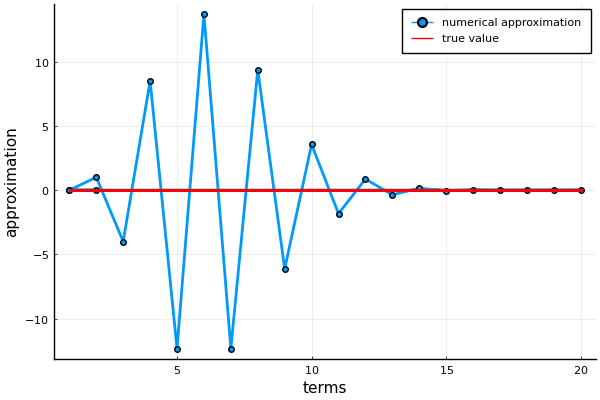

In [9]:
println("Estimating value of e^-5 using approach 1 (e^-x = 1 + x + x^2/2 + x^3/3! + ...)")
println("True value of e^-5 = ", exp(-5),"\n")

approach1(-5,20)

Estimating value of e^-5 using approach 2 (e^-x = 1/e^x =  1 / 1 + x + x^2/2 + x^3/3! + ...)
True value of e^-5 = 0.006737946999085467

Term #    Approximation               True Error          Approximate Error
1          1.0       14741.31591025766%      100.0%
2          0.16666666666666666       88947.89546154597%      83.33333333333334%
3          0.05405405405405406       274464.3443397667%      67.56756756756756%
4          0.025423728813559324       583658.4258034679%      52.966101694915245%
5          0.015296367112810707       970151.0276330946%      39.83428935627789%
6          0.010938924339106653       1.3566436294627213e6%      28.486782133090248%
7          0.008840321689483701       1.6787207976540765e6%      19.1847258886365%
8          0.00777489818585709       1.908775917790759e6%      12.05186350734296%
9          0.007230283266789742       2.0525603678761853e6%      7.0047852209566965%
10          0.006959452863649537       2.1324406179236444e6%      3.7457785974

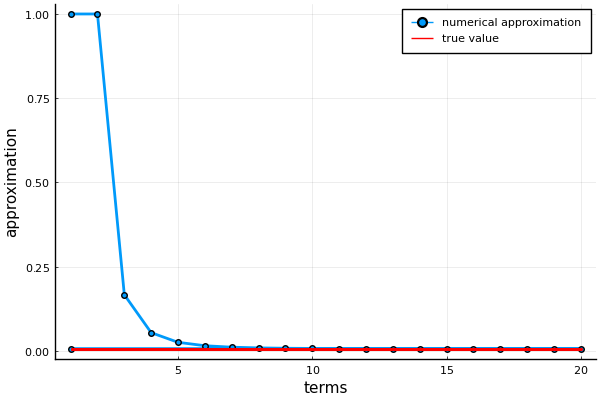

In [10]:
println("Estimating value of e^-5 using approach 2 (e^-x = 1/e^x =  1 / 1 + x + x^2/2 + x^3/3! + ...)")
println("True value of e^-5 = ", exp(-5),"\n")

approach2(-5,20)

### 3.) Evaluate MacLaurin series expansion for cos function (cos(pi/3))
##### MacLaurin series is given by:
\$cosx=1−x22+x44!−x66!+x88!−⋯\$

Starting with the simplest version, cosx=1, add terms one at a time to estimate cos(π3) . After each new term is added, compute the true and approximate percent relative errors. Use Julia to determine the true value. Add terms until the absolute value of the approximate error estimate falls below an error criterion conforming to two significant figures. Explain the reason if there are discrepancies in the errors.

In [11]:
function maclaurin_cos_expansion(x, sigfigs)
#= Print out the term number, term, and then compute the true and approximate relative errors by comparing 
    it to the true value. Takes an input of x of cos(x). Call graph function after. =#
    true_value = cos(x); true_error = 1; i = 2; approximate_error = 1
    approximation = ([0.0, 1.0]) #array that will hold the approximations
    specified_tolerance = 0.5*10^(2-sigfigs) #stopping criterion
    println("Term #    Approximation               True Error          Relative Error")
    while approximate_error > specified_tolerance 
        true_error = abs((true_value - approximation[i])/true_value)*100
        approximate_error = abs((approximation[i]-approximation[i-1])/approximation[i])*100
        println(i-1, "          ", approximation[i], "       ", true_error, "%      ", approximate_error,"%") 
        push!(approximation, (approximation[i]+((((-1)^(i-1))*(x^2(i-1)))/(factorial(big(2*(i-1)))))))
        i += 1
    end
    graph_against_true_value(i, approximation, true_value)
end

maclaurin_cos_expansion (generic function with 1 method)

Estimating value of cos(pi/3) using Mclaurin Series Expansion
True value of cos(pi/3) = 0.5000000000000001

Term #    Approximation               True Error          Relative Error
1          1.0       99.99999999999996%      100.0%
2          0.45168864438392464       9.66227112321509%      121.39144130221342%
3          0.501796201500181       0.3592403000361787%      9.985638983805318%
4          0.4999645653289127       0.007086934217481742%      0.3663531974637684%

 Graphing the approximations against the true value


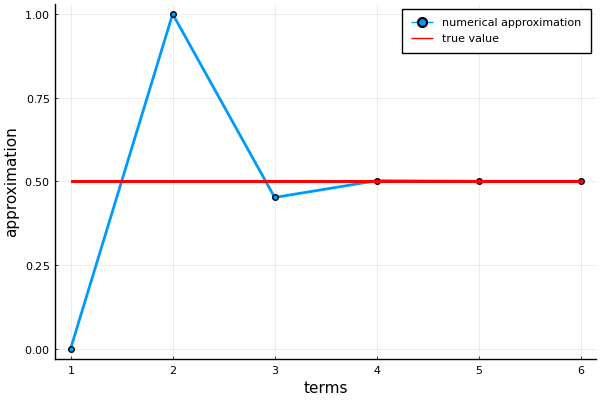

In [12]:
println("Estimating value of cos(pi/3) using Mclaurin Series Expansion")
println("True value of cos(pi/3) = ", cos((pi)/3) ,"\n")

maclaurin_cos_expansion((pi)/3, 2)